# Recognizer

In [10]:
import os
import cv2
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [11]:
# getting all images by people folder

faces = {}

for e in glob.glob('./faces_model2/**/*.jpg'):
    people = e.split('\\')[1]
    foto = e.split('\\')[2]
    img = cv2.imread(e)
    
    
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    #cv2.COLOR_BGR2GRAY
    #gray = gray.resize((250,250))
    
    if people in faces:
        faces[people]['images'].append(gray)
        faces[people]['name'].append(e)
        
    else:
        faces[people]={'images':[gray], 'name':[e]}

In [12]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [19]:
# interest region in faces pictures

name_id = {}
train = []
names = []
ids = 0

for people,images in faces.items():
    for ima,arr in enumerate(images['images']):
        
        if people not in name_id:          # condition to assign a number id to each name
            name_id[people] = ids
            ids += 1
        num_id = name_id[people]
        
        facesquare = face_cascade.detectMultiScale(arr, 1.09, 5)     # parameters very importan for the number of faces 1.1,7
        
        for (x,y,w,h) in facesquare:       # squares where the face should be
            square = arr[y:y+h, x:x+w]     # height, width
            train.append(square)
        names.append(num_id)
            

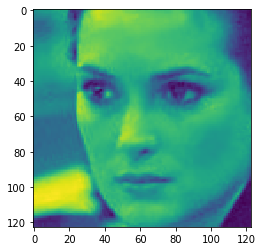

In [20]:
plt.imshow(train[80])

In [21]:
len(train)  # should be the number of pictures

84

In [22]:
recognizer = cv2.face.LBPHFaceRecognizer_create()

In [23]:
# saving models and files as pickle

with open("names_ids2.pickle", "wb") as f:
    pickle.dump(name_id, f)
    
recognizer.train(train, np.array(names))
recognizer.save("recognizer2.yml")          # saving the model